# 04wk-2: 딥러닝의 기초 (3)

최규빈  
2022-09-27

> 회귀분석(3)– step1의 다른버전 (복습+$\alpha$) // 로지스틱(1)– step4의
> 다른버전, 로지스틱 motive

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-zQEazdKzpyl8St3r8F9b8u>

# Imports

In [9]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# numpy, torch (선택학습)

## numpy, torch는 엄청 비슷해요

`-` torch.tensor() = np.array() 처럼 생각해도 무방

In [10]:
np.array([1,2,3]), torch.tensor([1,2,3])

`-` 소수점의 정밀도에서 차이가 있음 (torch가 좀 더 쪼잔함)

In [11]:
np.array([3.123456789])

In [12]:
torch.tensor([3.123456789])

`-` 기본적인 numpy 문법은 np 대신에 torch를 써도 무방 // 완전 같지는
않음

In [13]:
np.arange(10), torch.arange(10)

In [14]:
np.linspace(0,1,10), torch.linspace(0,1,10)

In [15]:
np.random.randn(10)

In [16]:
torch.randn(10)

## length $n$ vector, $n \times 1$ col-vector, $1 \times n$ row-vector

`-` 길이가 3인 벡터 선언방법

In [17]:
a = torch.tensor([1,2,3])
a.shape

`-` 3x1 col-vec 선언방법

(방법1)

In [18]:
a = torch.tensor([[1],[2],[3]])
a.shape

(방법2)

In [19]:
a = torch.tensor([1,2,3]).reshape(3,1)
a.shape

`-` 1x3 row-vec 선언방법

(방법1)

In [20]:
a = torch.tensor([[1,2,3]])
a.shape

(방법2)

In [21]:
a = torch.tensor([1,2,3]).reshape(1,3)
a.shape

`-` 3x1 col-vec 선언방법, 1x3 row-vec 선언방법에서 `[[1],[2],[3]]` 혹은
`[[1,2,3]]` 와 같은 표현이 이해안되면 아래링크로 가셔서

<https://guebin.github.io/STBDA2022/2022/03/14/(2주차)-3월14일.html>

첫번째 동영상 12:15 - 22:45 에 해당하는 분량을 학습하시길 바랍니다.

## torch의 dtype

`-` 기본적으로 torch는 소수점으로 저장되면 dtype=torch.float32 가 된다.
(이걸로 맞추는게 편리함)

In [22]:
tsr = torch.tensor([1.23,2.34])
tsr

In [23]:
tsr.dtype

`-` 정수로 선언하더라도 dtype를 torch.float32로 바꾸는게 유리함

(안 좋은 선언예시)

In [24]:
tsr = torch.tensor([1,2])
tsr 

In [25]:
tsr.dtype

(좋은 선언예시1)

In [26]:
tsr = torch.tensor([1,2],dtype=torch.float32)
tsr 

In [27]:
tsr.dtype

(좋은 선언예시2)

In [28]:
tsr = torch.tensor([1,2.0])
tsr 

In [29]:
tsr.dtype

(사실 int로 선언해도 나중에 float으로 바꾸면 큰 문제없음)

In [30]:
tsr = torch.tensor([1,2]).float()
tsr

In [31]:
tsr.dtype

`-` 왜 정수만으로 torch.tensor를 만들때에도 torch.float32로 바꾸는게
유리할까? $\to$ torch.tensor끼리의 연산에서 문제가 될 수 있음

별 문제 없을수도 있지만

In [32]:
torch.tensor([1,2])-torch.tensor([1.0,2.0]) 

아래와 같이 에러가 날수도 있다

(에러1)

In [33]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1],[2]]) 

(에러2)

In [34]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1.0],[2.0]])

(해결1) 둘다 정수로 통일

In [35]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1],[2]])

(해결2) 둘다 소수로 통일 \<– 더 좋은 방법임

In [36]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1.0],[2.0]])

## shape of vector

`-` 행렬곱셈에 대한 shape 조심

In [37]:
A = torch.tensor([[2.00,0.00],[0.00,3.00]]) 
b1 = torch.tensor([[-1.0,-5.0]])
b2 = torch.tensor([[-1.0],[-5.0]])
b3 = torch.tensor([-1.0,-5.0])

In [38]:
A.shape,b1.shape,b2.shape,b3.shape

`-` A@b1: 계산불가, b1@A: 계산가능

In [39]:
A@b1

In [40]:
b1@A

`-` A@b2: 계산가능, b2@A: 계산불가

In [41]:
A@b2

In [42]:
b2@A

`-` A@b3: 계산가능, b3@A: 계산가능

In [43]:
(A@b3).shape ## b3를 마치 col-vec 처럼 해석

In [44]:
(b3@A).shape ## b3를 마지 row-vec 처럼 해석

`-` 브로드캐스팅

In [45]:
a = torch.tensor([1,2,3])
a - 1

In [46]:
b = torch.tensor([[1],[2],[3]])
b - 1

In [47]:
a - b # a를 row-vec 로 해석

# step1의 다른버전 (복습 + $\alpha$)

## read data

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/posts/II.%20DNN/2022-09-22-regression.csv") 
df

In [10]:
x=torch.tensor(df.x).float().reshape(100,1)
y=torch.tensor(df.y).float().reshape(100,1)
_1 = torch.ones([100,1])
X = torch.concat([_1,x],axis=1)

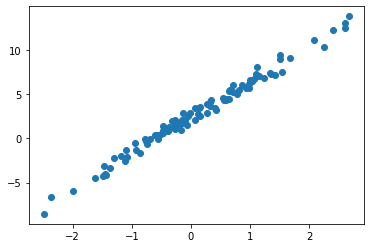

In [11]:
plt.plot(x,y,'o')

## ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [51]:
net = torch.nn.Linear(1,1,bias=True)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
net.weight,net.bias

`-` step1

In [52]:
yhat = net(x) 

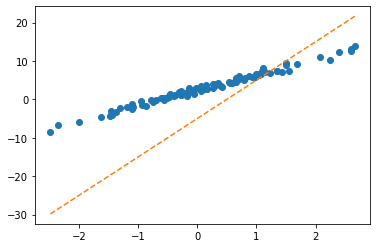

In [53]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` step2

In [54]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [55]:
net.bias,net.weight

In [56]:
net.bias.grad, net.weight.grad

(미분)

In [57]:
loss.backward()

(미분후)

In [58]:
net.bias,net.weight

In [59]:
net.bias.grad,net.weight.grad

`-` step4

(업데이트전)

In [60]:
net.bias,net.weight

In [61]:
net.bias.grad, net.weight.grad

(업데이트)

In [62]:
net.bias.data = net.bias.data - 0.1*net.bias.grad 
net.weight.data = net.weight.data - 0.1*net.weight.grad 

In [63]:
net.bias.grad = None 
net.weight.grad = None 

(업데이트후)

In [64]:
net.bias,net.weight

In [65]:
net.bias.grad, net.weight.grad

`-` 반복

In [66]:
for epoc in range(30):
    yhat = net(x) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.bias.data = net.bias.data - 0.1*net.bias.grad
    net.weight.grad = None
    net.bias.grad = None

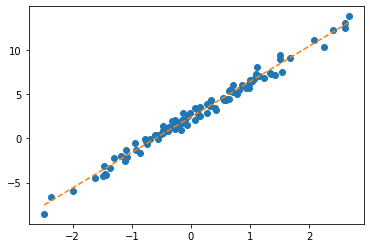

In [67]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

## ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 준비

In [81]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

`-` step1

In [82]:
yhat = net(X)

`-` step2

In [83]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [84]:
net.weight

In [85]:
net.weight.grad

(미분)

In [86]:
loss.backward()

(미분후)

In [87]:
net.weight

In [88]:
net.weight.grad

`-` step4

(업데이트전)

In [89]:
net.weight

In [90]:
net.weight.grad

(업데이트)

In [91]:
net.weight.data = net.weight.data - 0.1*net.weight.grad

In [92]:
net.weight.grad = None

(업데이트후)

In [93]:
net.weight

In [94]:
net.weight.grad

`-` 반복

In [98]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

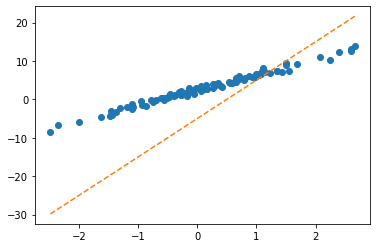

In [99]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [100]:
for epoc in range(30):
    yhat = net(X) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.weight.grad = None

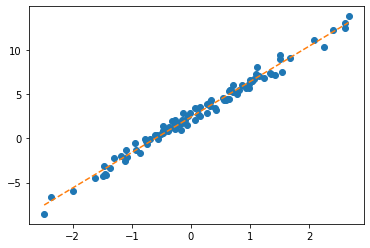

In [101]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

# step4의 다른버전: 옵티마이저!

## ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [113]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

In [114]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

`-` step1~3

In [115]:
yhat = net(x)     

In [116]:
loss = torch.mean((y-yhat)**2) 

In [117]:
loss.backward() 

`-` step4

(update 전)

In [118]:
net.weight.data, net.bias.data ## 값은 업데이트 전

In [119]:
net.weight.grad, net.bias.grad ## 미분값은 청소전 

(update)

In [120]:
optimizr.step() 
optimizr.zero_grad() 

(update 후)

In [121]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

In [122]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

`-` 반복

In [123]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [124]:
for epoc in range(30): 
    yhat = net(x)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

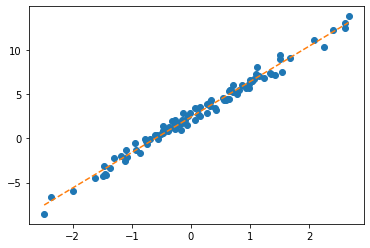

In [125]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

## ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 바로 반복하겠습니다..

In [126]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [127]:
for epoc in range(30): 
    yhat = net(X)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

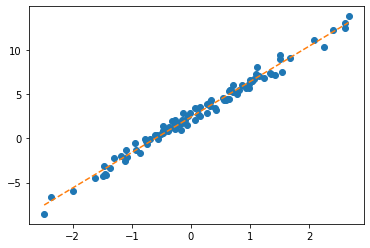

In [128]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

------------------------------------------------------------------------

# Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요

-   <https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html>,
    클래스공부 8단계 참고

`-` 탐구시작: 네트워크 생성

In [129]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

In [130]:
net.bias

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이
되어있음

    params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음
(iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를
의미)

In [131]:
set(dir(net.parameters)) & {'__iter__'}

In [132]:
set(dir(net.parameters())) & {'__iter__'}

`-` 무슨의미?

In [133]:
_generator = net.parameters()

In [134]:
_generator.__next__()

In [135]:
_generator.__next__()

In [136]:
_generator.__next__()

`-` 이건 이런느낌인데?

In [137]:
_generator2 = iter([net.weight,net.bias])

In [138]:
_generator2

In [139]:
_generator2.__next__()

In [140]:
_generator2.__next__()

In [141]:
_generator2.__next__()

`-` 즉 아래는 같은코드이다.

``` python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아
리스트(iterable object)로 만드는 함수라 이해할 수 있다.

`-` 응용예제1

In [142]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

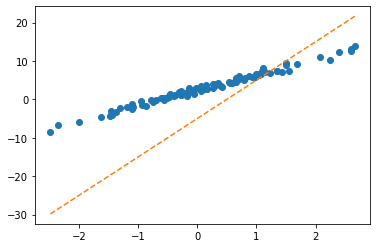

In [143]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [144]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

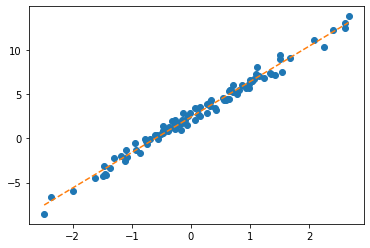

In [145]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [146]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

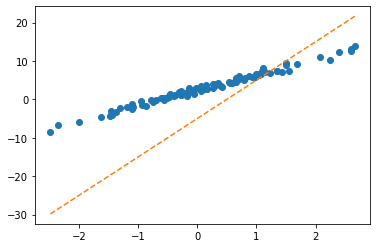

In [147]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [148]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

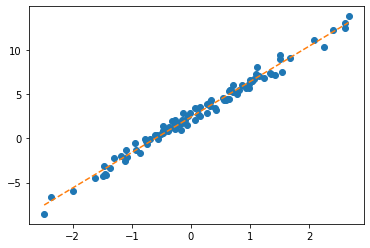

In [149]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

# Logistic regression

## motive

`-` 현실에서 이런 경우가 많음

-   $x$가 커질수록 (혹은 작아질수록) 성공확률이 증가함.

`-` (X,y)는 어떤모양?

In [249]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

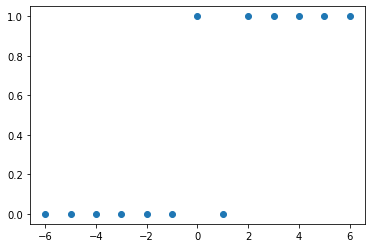

In [250]:
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음

In [251]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))

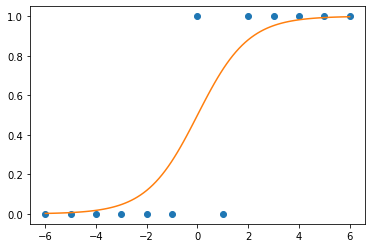

In [258]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))

## model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음
\<— 외우세요!!!

-   $y_i \sim Ber(\pi_i),\quad$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

-   $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

-   $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$
    \<— 외우세요!!

## toy example

`-` 예제시작

In [271]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= -1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함
y = torch.bernoulli(v) 

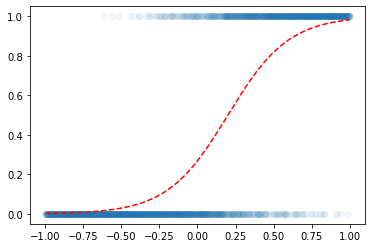

In [272]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')

-   우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는
    mapping을 학습해보자.